# Chapter 2: Overview of the Data Mining Process

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## 필요한 패키지 불러오기
우리는 데이터를 다루기 위해 Python의 데이터 분석 라이브러리인 pandas를 사용합니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

코드를 더 읽기 쉽게 만들기 위해 일부 패키지를 별칭(alias)으로 불러온다는 점에 유의하세요.
```
import <package> as <alias>
```
np, pd, plt와 같은 별칭은 데이터 과학 커뮤니티에서 일반적으로 사용됩니다.

다음 문장은 데이터 파일이 파일 시스템 내 어디에 위치해 있는지를 정의합니다. 여기서는 데이터 폴더가 이 ipython 노트북의 상위 폴더인 data에 있다고 가정합니다.

## Table 2.3 
West Roxbury 데이터 불러오기

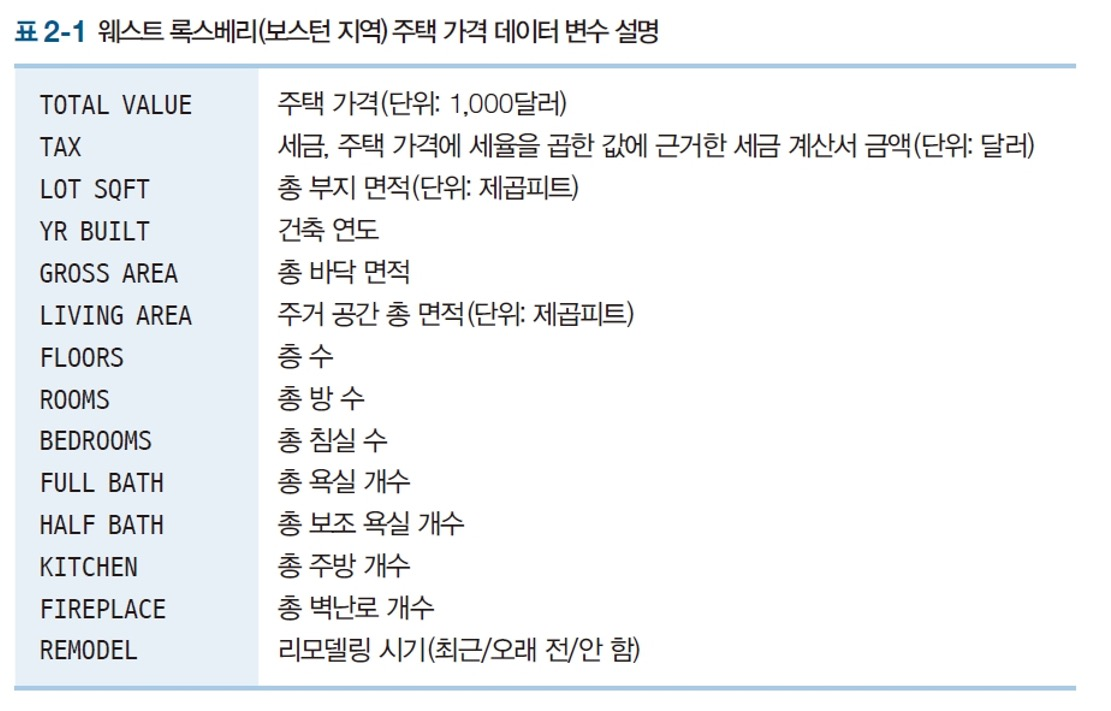

In [3]:
housing_df = pd.read_csv('../data/WestRoxbury.csv')

데이터 프레임의 형태(shape)를 확인하세요. 이 데이터 프레임은 5802개의 행과 14개의 열로 구성되어 있습니다.

In [4]:
housing_df.shape

(5802, 14)

데이터프레임의 상위 몇 개 행을 표시하세요.

In [5]:
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


## 정리 작업

데이터 전처리와 정리는 데이터 분석에서 중요한 과정입니다.

열(column) 이름을 확인하세요.

In [6]:
housing_df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

일부 열 이름은 끝에 공백이 포함되어 있고, 일부는 두 단어가 공백으로 구분되어 있다는 점에 유의하세요. 이후 분석을 위해서는 열 이름을 단일 단어로 구성하는 것이 더 편리합니다.
rename 명령에서는 딕셔너리(dictionary)를 사용하여 특정 열의 기존 이름과 새 이름을 지정할 수 있습니다. 

In [7]:
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

여기서는 inplace 인자를 사용한다는 점에 주의하세요. 이는 데이터프레임 자체가 직접 수정된다는 의미입니다. 기본적으로는 복사본에 대해 수정이 이루어지며, 이 복사본이 메서드의 반환값이 됩니다.

In [8]:
housing_df.rename(columns={'TOTAL_VALUE': 'TOTAL_VALUE2'}, inplace=True)
housing_df.columns

Index(['TOTAL_VALUE2', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [9]:
housing_df.rename(columns={'TOTAL_VALUE2': 'TOTAL_VALUE'}, inplace=True)
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

따라서 우리는 끝에 있는 공백(trailing spaces)을 제거하고, 남아 있는 공백은 밑줄(`_`)로 대체합니다. `rename` 메서드를 사용하는 대신, `columns`를 수정한 복사본을 만들어 데이터프레임의 `columns` 속성에 직접 할당합니다.

In [10]:
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

## 데이터의 부분집합에 접근하기
Pandas는 데이터 프레임의 행에 접근하기 위해 두 가지 메서드인 `loc`과 `iloc`을 사용합니다. `loc` 메서드는 더 일반적으로 사용되며, 레이블을 이용해 행에 접근할 수 있습니다. 반면, `iloc` 메서드는 정수 숫자만 사용할 수 있습니다. 행의 범위를 지정하려면 슬라이스 표기법을 사용하면 됩니다. 예를 들어 `0:9`처럼 사용합니다.

<div class='alert alert-info'>Python은 0부터 인덱싱을 시작한다는 점에 유의하세요. 즉, 인덱스는 1이 아니라 0부터 시작합니다.</div>

데이터 프레임의 처음 네 개 행을 표시하려면, 다음 명령어를 사용할 수 있습니다.


In [11]:
housing_df.loc[0:3]  # for loc, the second index in the slice is inclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


In [12]:
# 위의 설명은 좀 혼란을 줄 수 있음. loc는 주어진 값과 매칭되는 행을 보여줌
housing_df.loc[[0,5]]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,Old


In [13]:
housing_df.iloc[0:4]  # for loc, the second index in the slice is exclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


슬라이스 표기법과 관련하여 두 메서드 간의 차이에 주의하세요! Python에서 슬라이스가 정의되는 방식과의 일관성을 위해, 이제부터는 주로 `iloc` 메서드를 사용할 것입니다.

다음으로, 첫 번째 열의 처음 10개 행을 출력해 보세요.

In [14]:
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']  # the order is not important
housing_df.iloc[0:10].TOTAL_VALUE

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

처음 10개 열의 다섯 번째 행을 출력하세요. `iloc` 메서드는 하나의 대괄호 안에서 행과 열을 함께 지정할 수 있습니다.
`dataframe.iloc[행, 열]` 형식으로 사용합니다.

In [17]:
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]  # this is equivalent #아니 왜 3번째줄이 아니라 4번째 행 값을 보여주는 거야..??

TOTAL_VALUE    331.5
TAX             4170
LOT_SQFT        5000
YR_BUILT        1910
GROSS_AREA      2370
LIVING_AREA     1438
FLOORS           2.0
ROOMS              7
BEDROOMS           3
FULL_BATH          2
Name: 4, dtype: object

데이터 프레임 형식을 유지하고 싶다면, 행에 대해서도 슬라이스를 사용하세요.

In [9]:
housing_df.iloc[4:5, 0:10]

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


연속되지 않은 열들을 하나의 새로운 데이터 프레임으로 결합하고 싶다면 `pd.concat` 메서드를 사용하세요. `axis` 인자는 결합이 이루어지는 방향을 지정하며, `0`은 행 방향, `1`은 열 방향을 의미합니다.

In [10]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL VALUE,TAX,GROSS AREA,LIVING AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


전체 열을 지정하려면 : 만 단독으로 사용하세요.
```
housing_df.iloc[:,0:1]
```
보다 실용적인 방법은 다음과 같이 열 이름을 사용하는 것입니다.

In [83]:
housing_df['TOTAL_VALUE']

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

슬라이스를 사용하여 열을 부분 선택할 수 있습니다.

In [84]:
housing_df['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

Pandas는 열의 통계 정보를 확인할 수 있는 여러 가지 방법을 제공합니다.

In [85]:
print('Number of rows ', len(housing_df['TOTAL_VALUE']))
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean())

Number of rows  5802
Mean of TOTAL_VALUE  392.6857149258885


데이터 프레임에는 `describe`라는 메서드도 있어, 여러 가지 일반적인 통계 정보를 출력해 줍니다.

In [86]:
housing_df['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

In [87]:
housing_df.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


## Table 2.4
`sample` 메서드를 사용하면 관측값 중에서 임의의 샘플을 추출할 수 있습니다.
여기서는 중복 없이 5개의 관측값을 샘플링합니다.

In [88]:
housing_df.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
4208,385.0,4843,5007,1920,3417,1512,1.0,7,4,2,0,1,0,Old
4610,447.5,5629,5000,1925,3148,1877,2.0,8,3,2,0,1,0,None
156,337.5,4245,5914,1925,2594,1131,1.0,6,3,1,0,1,0,None
1683,383.7,4826,5447,1967,2272,1284,1.5,7,4,1,2,1,0,Old
3749,322.0,4050,5320,1934,3434,1383,1.0,5,2,1,0,1,0,None


`sample` 메서드는 각 행에 대해 가중치를 지정할 수 있습니다.
여기서는 방이 10개 초과인 집들을 과샘플링(oversample)하기 위해 이를 사용합니다.

In [18]:
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
2681,511.5,6434,10531,1910,4997,2781,2.0,12,5,1,2,1,1,NaN
2043,346.6,4360,4334,1935,1952,1248,2.0,7,3,1,0,1,1,NaN
1168,300.4,3779,5051,1920,2130,1352,2.0,7,3,1,0,1,0,NaN
2589,530.3,6671,10000,1890,4628,2908,2.0,11,6,1,1,1,1,NaN
5220,447.9,5634,5000,1920,3917,2012,2.0,11,4,1,1,1,0,NaN


## Table 2.5

In [19]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

`REMODEL` 열은 범주형(factor) 변수이므로, 해당 열의 자료형을 변경해야 합니다.

In [20]:
print(housing_df.REMODEL.dtype)
housing_df.REMODEL = housing_df.REMODEL.astype('category')
print(housing_df.REMODEL.cat.categories)  # It can take one of three levels
print(housing_df.REMODEL.dtype)  # Type is now 'category'

object
Index(['Old', 'Recent'], dtype='object')
category


다른 열들도 각각의 자료형을 가지고 있습니다.

In [91]:
print(housing_df.BEDROOMS.dtype)  # BEDROOMS is an integer variable
print(housing_df.TOTAL_VALUE.dtype)  # Total_Value is a numeric variable #int는 정수형(소수점없는), float은 실수형(소수점있음)

int64
float64


모든 열의 자료형을 확인하는 것도 가능합니다.

In [21]:
housing_df.dtypes #64는 bit 수를 의미

TOTAL_VALUE     float64
TAX               int64
LOT_SQFT          int64
YR_BUILT          int64
GROSS_AREA        int64
LIVING_AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL_BATH         int64
HALF_BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL        category
dtype: object

## Table 2.6

위에서 REMODEL을 category로 변환한 후에 더미 변수를 만들고 있는데, 변환하지 않고 object 변수를 더미 변수로 많들어도 결과는 같음

Pandas는 범주형 변수(factor)를 더미 변수(dummy variable)로 변환하는 메서드를 제공합니다. pd.get_dummies( , drop_first=True)의 의미는 N개의 범주라면 N-1개의 변수를 생성하라는 뜻이며 맨 처음 범주가 누락됨

In [93]:
housing_df2 = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)
housing_df2.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [94]:
print(housing_df2.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5))

   REMODEL_Old  REMODEL_Recent
0            0               0
1            0               1
2            0               0
3            0               0
4            0               0


In [95]:
housing_df3 = pd.get_dummies(housing_df, prefix_sep='_')
housing_df3.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_None', 'REMODEL_Old',
       'REMODEL_Recent'],
      dtype='object')

In [96]:
print(housing_df3.loc[:, 'REMODEL_None':'REMODEL_Recent'].head(5))

   REMODEL_None  REMODEL_Old  REMODEL_Recent
0             1            0               0
1             0            0               1
2             1            0               0
3             1            0               0
4             1            0               0


In [97]:
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

## Table 2.7
결측치 처리 방법을 설명하기 위해, 먼저 일부 침실 수 항목을 NA로 변환합니다. 그런 다음, 남아 있는 값들의 중앙값을 사용하여 이 결측값들을 대체합니다.

In [28]:
print('Number of rows with valid BEDROOMS values before: ', 
      housing_df['BEDROOMS'].count()) 
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', 
      housing_df['BEDROOMS'].count()) 
housing_df['BEDROOMS'].count()

Number of rows with valid BEDROOMS values before:  5802
Number of rows with valid BEDROOMS values after setting to NAN:  5792


5792

In [22]:
# remove rows with missing values 
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  1456


결측값은 남아 있는 값들의 중앙값을 사용하여 대체합니다.

기본적으로 pandas 데이터프레임의 `median` 메서드는 NA 값을 무시합니다. 

In [30]:
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NA values:  5802


## Table - scaling data

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()

# Normalizing a data frame

# pandas:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()

# scikit-learn: 
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)
# 변환 결과는 널 배열이며, 이를 데이터 프레임으로 변환합니다.

# Rescaling a data frame
# pandas:
rescaled_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())

# scikit-learn:
scaler = MinMaxScaler()
rescaled_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)

###
데이터 세트의 표준화로 인해 <코드>DataConversionWarning</코드>가 표시될 수 있습니다. 이는 데이터 프레임의 정수 열이 자동으로 실수(<code>float64</code>)로 변환된다는 것을 알려줍니다. 이는 예상되는 현상이므로 이 경고를 무시해도 됩니다. 경고를 표시하지 않으려면 정수 열을 실수로 명시적으로 변환하면 됩니다</p>
<pre>
# 옵션 1: 모든 정수 열을 식별하고 개인 대출을 제거합니다, 
#
intColumns = [c for c in housing_df.columns if housing_df[c].dtype == 'int']
housing_df[intColumns] = housing_df[intColumns].astype('float64')
</pre>
또는 다음과 같이 경고가 표시되지 않도록 할 수 있습니다:
<pre>
# 옵션 2: 경고 패키지를 사용하여 경고 표시를 억제하는 방법
import warnings
with warnings.catch_warnings():
 warnings.simplefilter('ignore')
 norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
 index=housing_df.index, columns=housing_df.columns) 
</pre>
###

## Table 2.9
데이터셋을 학습용(60%)과 검증용(40%) 세트로 나눕니다. 전체 데이터셋에서 무작위로 60%를 추출하여 새로운 데이터프레임 `trainData`로 만들고, 나머지 40%는 검증용으로 사용합니다.

In [32]:
#코드를 다시 실행할 때 동일한 파티션을 얻으려면 # RANDOM_STATE를 정의된 값으로 설정합니다.
trainData= housing_df.sample(frac=0.6, random_state=1)
# 아직 훈련 집합에 없는 행을 유효성 검사에 할당합니다. 
validData = housing_df.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

# alternative way using scikit-learn
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (3481, 15)
Validation :  (2321, 15)

Training   :  (3481, 15)
Validation :  (2321, 15)


데이터셋을 학습용(50%), 검증용(30%), 테스트용(20%) 세트로 분할합니다.

In [33]:
# 훈련용 행 ID의 50%를 무작위로 샘플링
trainData = housing_df.sample(frac=0.5, random_state=1)
# 행 ID의 30%를 유효성 검사 집합에 샘플링하여 레코드에서만 추출합니다.
# 아직 훈련 집합에 없음, 50%의 60%는 30%
validData = housing_df.drop(trainData.index).sample(frac=0.6, random_state=1)  
# 나머지 20% 행은 테스트로 사용
testData = housing_df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# alternative way using scikit-learn
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)

Training   :  (2901, 15)
Validation :  (1741, 15)
Test       :  (1160, 15)

Training   :  (2901, 15)
Validation :  (1740, 15)
Test       :  (1161, 15)


## Table 2.11
statsmodels 패키지는 수식 정의를 사용하여 선형 회귀 모델을 정의할 수 있도록 합니다. 이때 모든 변수는 명시적으로 지정해야 합니다. 여기서는 종속 변수와 `TAX` 열을 제외한 수식을 구성합니다.

In [34]:
# Data loading and preprocessing
housing_df = pd.read_csv('../data/WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE   predicted   residual
2024        392.0  387.726258   4.273742
5140        476.3  430.785540  45.514460
5259        367.4  384.042952 -16.642952
421         350.3  369.005551 -18.705551
1401        348.1  314.725722  33.374278


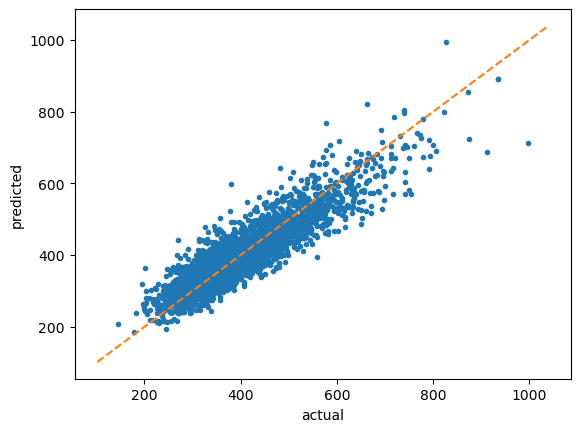

In [35]:
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca() # gca는 "get current axis"의 약자
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

검증 데이터를 예측합니다.

In [36]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y, 
    'predicted': valid_pred, 
    'residual': valid_y - valid_pred
})
print(valid_results.head())

      TOTAL_VALUE   predicted   residual
1822        462.0  406.946377  55.053623
1998        370.4  362.888928   7.511072
5126        407.4  390.287208  17.112792
808         316.1  382.470203 -66.370203
4034        393.2  434.334998 -41.134998


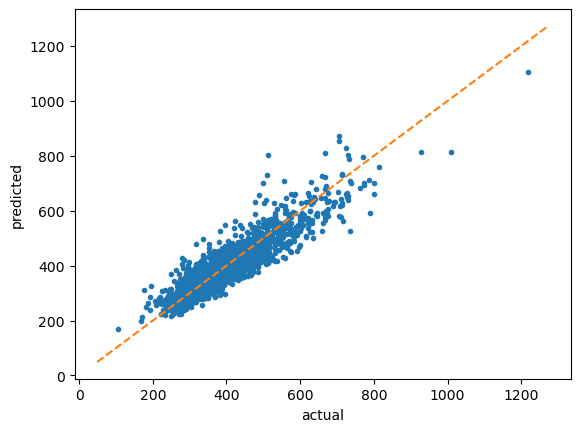

In [37]:
plt.plot(valid_results.TOTAL_VALUE, valid_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

## Table 2.13
scikit-learn에서 제공하는 평가 지표들을 사용할 수 있습니다.

In [38]:
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

Training set r2:  0.8097361461091853
Validation set r2:  0.8171327286147877


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_summary(y_true, y_pred):
    # 기본 지표 계산
    me = np.mean(y_pred - y_true)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # 분모가 0이 되는 경우를 방지
    mpe = np.mean((y_pred - y_true) / np.where(y_true == 0, 1e-10, y_true)) * 100
    mape = np.mean(np.abs((y_pred - y_true) / np.where(y_true == 0, 1e-10, y_true))) * 100
    r2 = r2_score(y_true, y_pred)

    # 출력
    print(f"Mean Error (ME): {me:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Percentage Error (MPE): {mpe:.2f}%")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared: {r2:.4f}")

In [40]:
# training set
regression_summary(train_results.TOTAL_VALUE, train_results.predicted)
print()
# validation set
regression_summary(valid_results.TOTAL_VALUE, valid_results.predicted)

Mean Error (ME): -0.0000
Root Mean Squared Error (RMSE): 43.0306
Mean Absolute Error (MAE): 32.6042
Mean Percentage Error (MPE): 1.11%
Mean Absolute Percentage Error (MAPE): 8.49%
R-squared: 0.8097

Mean Error (ME): 0.1463
Root Mean Squared Error (RMSE): 42.7292
Mean Absolute Error (MAE): 31.9663
Mean Percentage Error (MPE): 1.09%
Mean Absolute Percentage Error (MAPE): 8.33%
R-squared: 0.8171


## Table 2.14

In [41]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})
print(new_data)

print('Predictions: ', model.predict(new_data))

   LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [384.47210285 378.06696706 386.01773842]


## Figure 2.2 and 2.3

In [42]:
df = pd.DataFrame({'Expenditure': [239, 364,602, 644, 770, 789, 911], 
                   'Revenue': [514, 789, 550, 1386, 1394, 1440, 1354]})
df

,Expenditure,Revenue
0,239,514
1,364,789
2,602,550
3,644,1386
4,770,1394
5,789,1440
6,911,1354


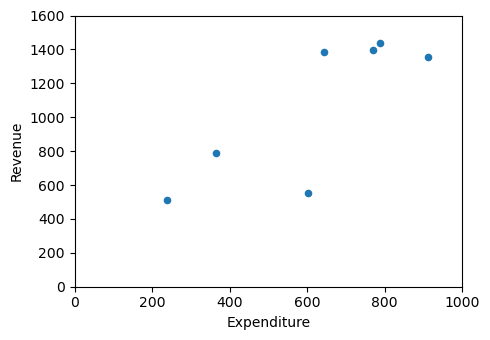

In [43]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.tight_layout()  # Increase the separation between the plots
plt.show()

In [44]:
x = list(df.Expenditure)
y = list(df.Revenue)

from scipy import interpolate
f = interpolate.PchipInterpolator(x, y)

x_new = np.linspace(x[0], x[-1], 100)
y_new = [f(xi) for xi in x_new]

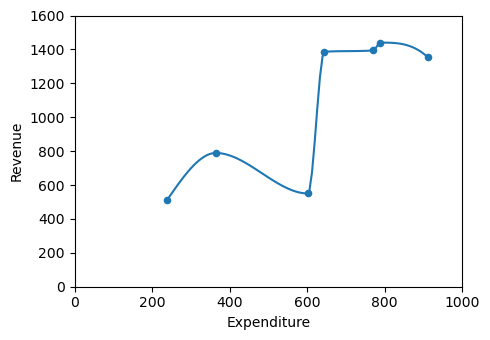

In [45]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.plot(x_new, y_new)
plt.tight_layout()  # Increase the separation between the plots
plt.show()